# ill-condition deconvolution 1-dimensional

Consider a $1$-dimensional signal $x\in\mathbb{R}^n$ for large $n$. Assume that you actually observe a smoothened version $y$ of $x$, say 
\begin{equation*}
y = A x,\qquad A=\frac{1}{4}\begin{pmatrix}
2&1 &0 &\cdots&0\\
1&\ddots&\ddots\\
0&\ddots&\ddots&\ddots&0\\
\vdots & &\ddots&\ddots&1\\
0 &\cdots &0&1&2
\end{pmatrix}.
\end{equation*}
Since $\det(A)=\frac{n+1}{4^n}$, the matrix $A$ is invertible. Assume now that $y$ is distorted by additive noise, i.e., 
\begin{equation*}
\tilde{y}=y+\varepsilon.
\end{equation*}
Even if $\varepsilon$ is barely visible, the consequences for the reconstruction can be fatal. To understand this behavior, we first observe that $\|A\|_{1}=1$, for $n\geq 3$, but $\|A^{-1}\|_1=\lfloor \frac{(n+1)^2}{2}\rfloor$ is large. Thus, although $\varepsilon$ may be small, $A^{-1}\varepsilon$ can be large. The relation 
\begin{equation*}
A^{-1}\tilde{y} = A^{-1}y + A^{-1}\varepsilon
\end{equation*}
reveals that the reconstruction is distorted by $ A^{-1}\varepsilon$, and, hence, is an ill conditioned problem.

In [2]:
using LinearAlgebra, Plots, Random, LaTeXStrings

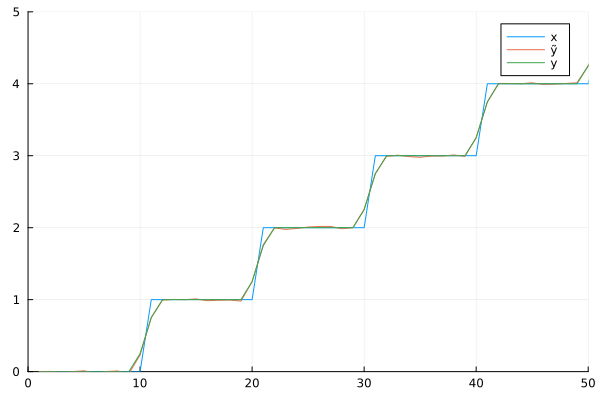

In [3]:
n = 1000
A = 1/4*Tridiagonal(ones(n-1),2*ones(n),ones(n-1))
f(x) = floor(x)
x = range(0,n/10,n)
x = f.(x)
y = A*x
Random.seed!(1)
ε = 0.01*randn(n)
ỹ = y+ε
plot(x,label="x",xlimits=[0;50],ylimits=[0,5])
plot!(ỹ,label="ỹ")
plot!(y,label="y")

In [4]:
# savefig("noisy_smoothened.pdf")

norm(y) = 1810.8834860365819
norm(ε) = 0.3179999854917873


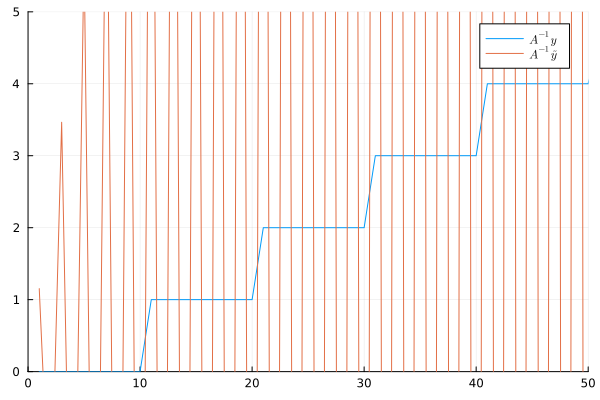

In [5]:
@show norm(y)
@show norm(ε)
invA = inv(A)
plot(invA*y,label=L"A^{-1}y",xlimits=[050],ylimits=[0,5])
plot!(invA*ỹ,label=L"A^{-1}\tilde{y}",xlimits=[0,50],ylimits=[0,5])

In [6]:
# savefig("distortedReconstruction.pdf")

## find $det(A)$

In [7]:
for n in 2:7
    A = Rational.(Tridiagonal(ones(n-1),2*ones(n),ones(n-1))/4)
@show n, det(A)
end

(n, det(A)) = (2, 3//16)
(n, det(A)) = (3, 1//16)
(n, det(A)) = (4, 5//256)
(n, det(A)) = (5, 3//512)
(n, det(A)) = (6, 7//4096)
(n, det(A)) = (7, 1//2048)


In [8]:
q = []
for n in 2:7
    A = Rational.(Tridiagonal(ones(n-1),2*ones(n),ones(n-1))/4)
    push!(q,det(A))
end
q  #find sequence 

6-element Vector{Any}:
 3//16
 1//16
 5//256
 3//512
 7//4096
 1//2048

In [9]:
for n in 2:7
    A = Rational.(Tridiagonal(ones(n-1),2*ones(n),ones(n-1))/4)
    @show n, opnorm(inv(A),1)
end

(n, opnorm(inv(A), 1)) = (2, 4.0)
(n, opnorm(inv(A), 1)) = (3, 8.0)
(n, opnorm(inv(A), 1)) = (4, 12.000000000000002)
(n, opnorm(inv(A), 1)) = (5, 18.0)
(n, opnorm(inv(A), 1)) = (6, 24.0)
(n, opnorm(inv(A), 1)) = (7, 32.0)


In [10]:
q = []
for n in 2:10
    A = Rational.(Tridiagonal(ones(n-1),2*ones(n),ones(n-1))/4)
    push!(q,opnorm(inv(A),1))
end
round.(Int,q)

9-element Vector{Int64}:
  4
  8
 12
 18
 24
 32
 40
 50
 60

# ill-conditioned deconvolution 2-dimensional

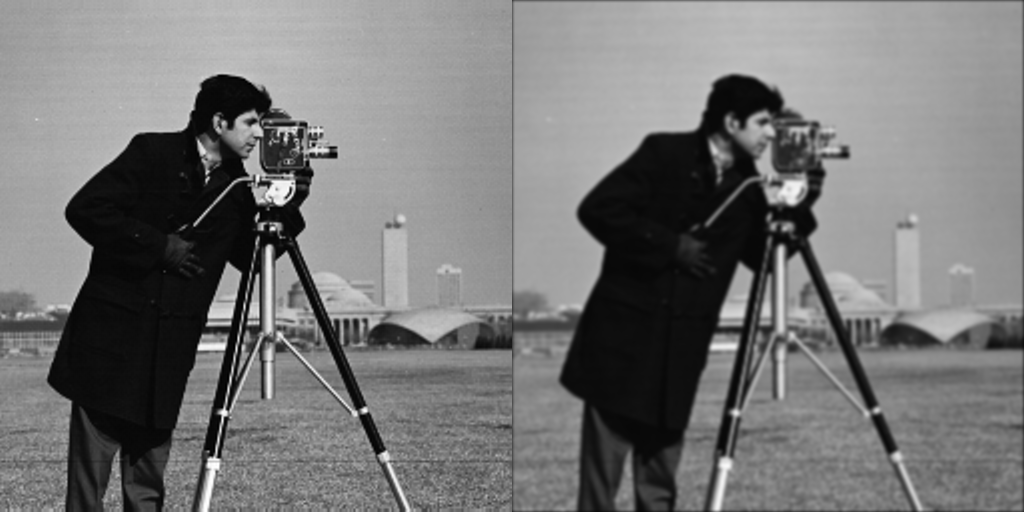

In [20]:
using ImageFiltering, TestImages, Images
X = testimage("cameraman.tif");
m,n = size(X)

function constr_A(n) 
    A = zeros(n,n)
    A[1,1:4] = [4 3 2 1]
    A[2,1:5] = [3 4 3 2 1]
    A[3,1:6] = [2 3 4 3 2 1]
    for k in 4:n-3
        A[k,k-3:k+3] = [1 2 3 4 3 2 1]
    end
    A[n-2,n-5:n] = [1 2 3 4 3 2] 
    A[n-1,n-4:n] = [1 2 3 4 3] 
    A[n,n-3:n] = [1 2 3 4]
    return 1/16*A
end

A = constr_A(n)
Y = A*X*A;
display(mosaicview(X,Y; nrow=1))

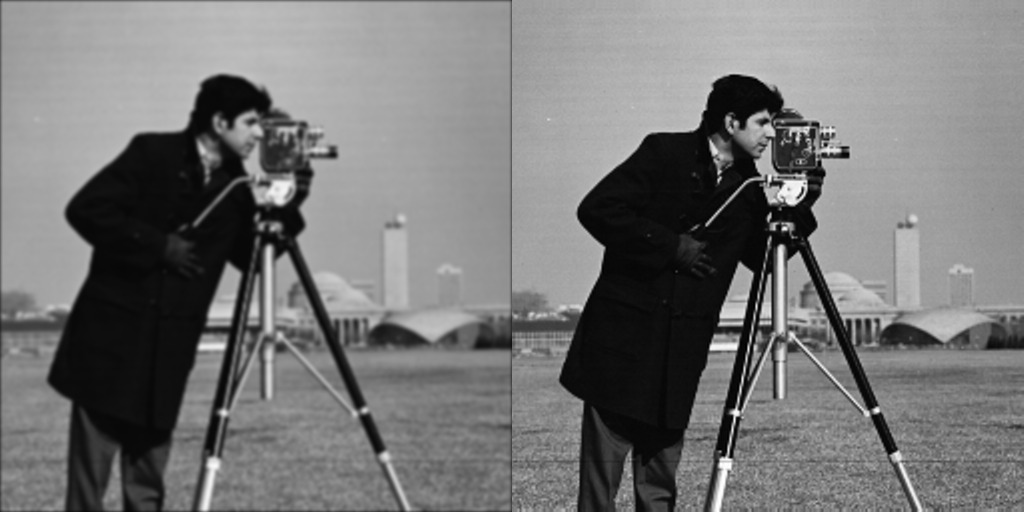

In [17]:
A⁻¹ = inv(A)
mosaicview(Y,A⁻¹*Y*A⁻¹; nrow=1)

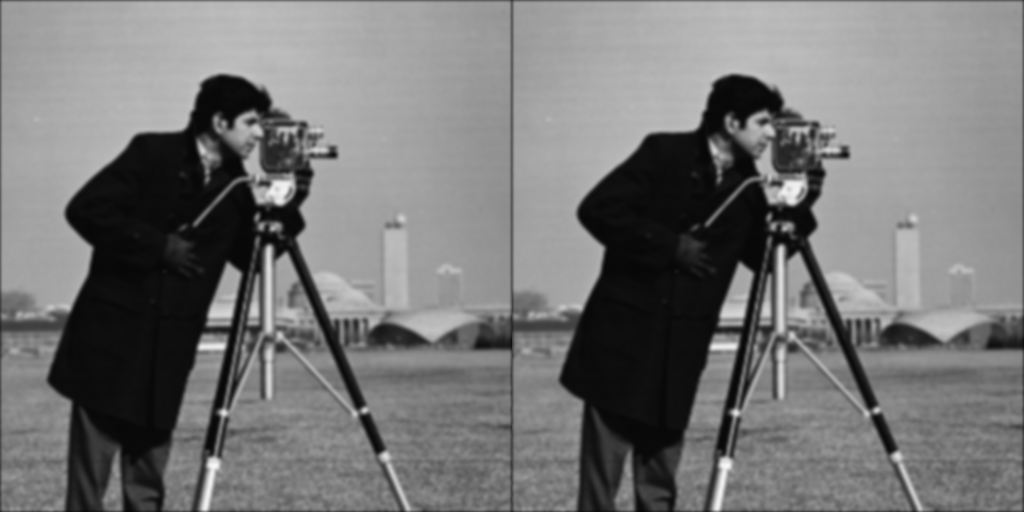

In [18]:
Random.seed!(1)
ε = 1e-6*randn(m,n)
Ỹ = Y+ε
mosaicview(Y,Ỹ; nrow=1)

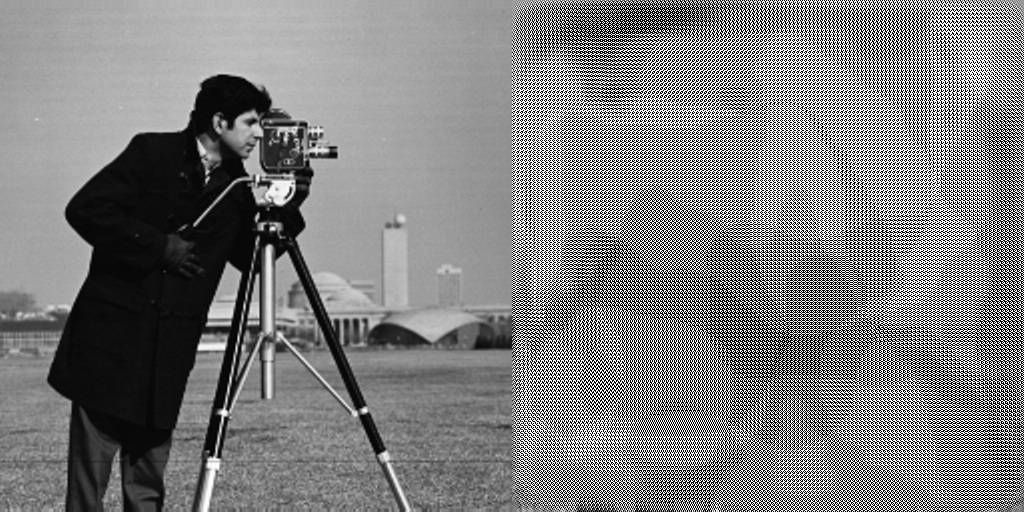

In [22]:
mosaicview(A⁻¹*Y*A⁻¹,A⁻¹*Ỹ*A⁻¹; nrow=1)

In [51]:
# save("camera_original.pdf",X)
# save("camera_convolution.pdf",Y)
# save("camera_perturbed.pdf",Ỹ)
# save("camera_reconstruction.pdf",clamp.(A⁻¹*Y*A⁻¹,0,1))
# save("camera_reconstruction2.pdf",clamp.(A⁻¹*Ỹ*A⁻¹,0,1))